# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [36]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [37]:
response = requests.get("https://api.openweathermap.org/data/2.5/weather?lat=27.39646457203644&lon=123.01216206461173&appid=1a612cc88541ab51e114f09e678389f7")
response = requests.get("https://api.openweathermap.org/data/2.5/weather?lat=44.34&lon=10.99&appid=1a612cc88541ab51e114f09e678389f7")
response = requests.get("https://api.openweathermap.org/data/2.5/weather?lat=27.731215568617454&lon=95.11774944451447&appid=1a612cc88541ab51e114f09e678389f7")
data = response.json()
data


{'coord': {'lon': 95.1177, 'lat': 27.7312},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 300.84,
  'feels_like': 304.76,
  'temp_min': 300.84,
  'temp_max': 300.84,
  'pressure': 1004,
  'humidity': 82,
  'sea_level': 1004,
  'grnd_level': 989},
 'visibility': 10000,
 'wind': {'speed': 0.29, 'deg': 102, 'gust': 0.3},
 'rain': {'1h': 0.12},
 'clouds': {'all': 9},
 'dt': 1717979819,
 'sys': {'country': 'IN', 'sunrise': 1717972996, 'sunset': 1718022896},
 'timezone': 19800,
 'id': 1274954,
 'name': 'Chābua',
 'cod': 200}

In [38]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url.format(lat=lats[i], lon=lngs[i], api_key=weather_api_key)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s | %s" % (record_count, set_count, city, city_url))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url)
    try:
        # Parse the JSON and retrieve data
        response_json = response.json()
        city_weather = response_json["weather"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_json["coord"]["lat"]
        city_lng = response_json["coord"]["lon"]
        city_max_temp = response_json["main"]["temp_max"]
        city_humidity = response_json["main"]["humidity"]
        city_clouds = response_json["clouds"]["all"]
        city_wind = response_json["wind"]["speed"]
        city_country = response_json["sys"]["country"]
        city_date = response_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi | https://api.openweathermap.org/data/2.5/weather?lat=-88.5489922805153&lon=-167.61406634593715&appid=1a612cc88541ab51e114f09e678389f7&units=metric
City not found. Skipping...
Processing Record 2 of Set 1 | pisco | https://api.openweathermap.org/data/2.5/weather?lat=-26.062852820621636&lon=-99.35880997787993&appid=1a612cc88541ab51e114f09e678389f7&units=metric
City not found. Skipping...
Processing Record 3 of Set 1 | margaret river | https://api.openweathermap.org/data/2.5/weather?lat=-36.64009502440889&lon=114.89809532606613&appid=1a612cc88541ab51e114f09e678389f7&units=metric
City not found. Skipping...
Processing Record 4 of Set 1 | grytviken | https://api.openweathermap.org/data/2.5/weather?lat=-51.575686154642234&lon=-28.406444481656564&appid=1a612cc88541ab51e114f09e678389f7&units=metric
City not found. Skipping...
Processing Record 5 of Set 1 | port-aux-francais | https://api.openwe

In [39]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          157
Lat           157
Lng           157
Max Temp      157
Humidity      157
Cloudiness    157
Wind Speed    157
Country       157
Date          157
dtype: int64

In [40]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kongolo,-5.6316,27.2291,19.04,51,3,1.25,CD,1717979823
1,goure,14.8911,10.8644,30.51,11,69,3.63,NE,1717979823
2,hayma',20.4445,56.4549,27.40,79,0,4.88,OM,1717979824
3,algeciras,2.5951,-75.0676,14.59,99,100,1.12,CO,1717979824
4,thinadhoo,28.7228,74.4299,33.21,30,81,5.83,IN,1717979825


In [41]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [42]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kongolo,-5.6316,27.2291,19.04,51,3,1.25,CD,1717979823
1,goure,14.8911,10.8644,30.51,11,69,3.63,NE,1717979823
2,hayma',20.4445,56.4549,27.40,79,0,4.88,OM,1717979824
3,algeciras,2.5951,-75.0676,14.59,99,100,1.12,CO,1717979824
4,thinadhoo,28.7228,74.4299,33.21,30,81,5.83,IN,1717979825


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

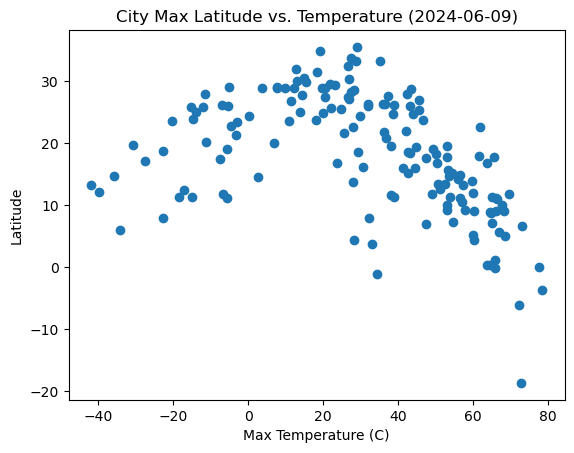

In [55]:
import datetime

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
unix_timestamp = city_data_df["Date"][0]
readable_date = datetime.datetime.fromtimestamp(unix_timestamp)
formatted_date = readable_date.strftime('%Y-%m-%d')
plt.title(f"City Max Latitude vs. Temperature ({formatted_date})")
plt.xlabel('Max Temperature (C)')
plt.ylabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

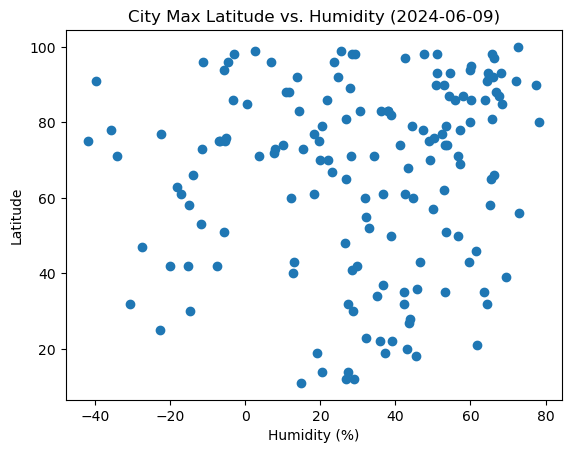

In [56]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity ({formatted_date})")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

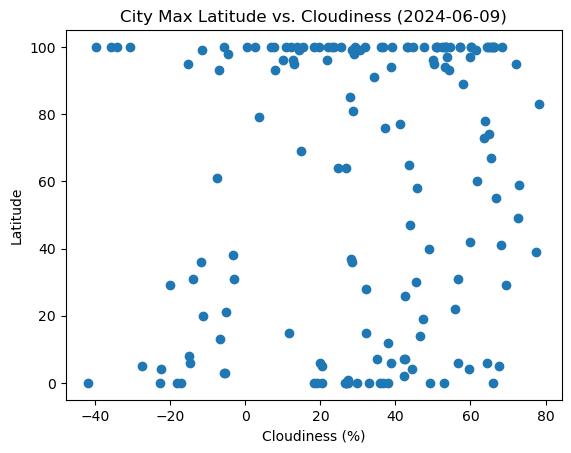

In [57]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness ({formatted_date})")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

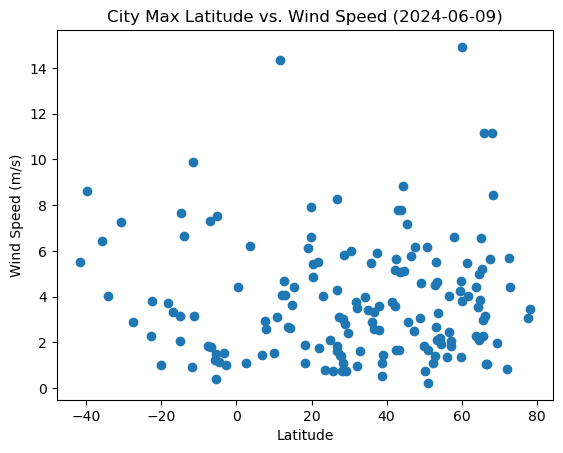

In [60]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed ({formatted_date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [71]:
# Define a function to create Linear Regression plots
def drawLinearRegressionPlot(x, y):
    # Perform linear regression using linregress
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calculate the regression line
    regression_line = slope * x + intercept

    # Create scatter plot
    plt.scatter(x, y)

    # Plot the regression line
    plt.plot(x, regression_line, color='red', label='Regression Line')

    # Add titles and labels
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')

    equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(x.min(), y.min(), equation_text, fontsize=12, color='red')

    # Show plot
    plt.show()


In [62]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,goure,14.8911,10.8644,30.51,11,69,3.63,NE,1717979823
2,hayma',20.4445,56.4549,27.40,79,0,4.88,OM,1717979824
3,algeciras,2.5951,-75.0676,14.59,99,100,1.12,CO,1717979824
4,thinadhoo,28.7228,74.4299,33.21,30,81,5.83,IN,1717979825
5,newman,59.8891,163.8963,5.16,94,97,4.69,RU,1717979827


In [64]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kongolo,-5.6316,27.2291,19.04,51,3,1.25,CD,1717979823
8,utrik,-22.7501,118.4515,18.72,25,0,2.26,AU,1717979828
9,kavieng,-6.7467,34.0958,11.79,75,13,1.79,TZ,1717979828
15,carnarvon,-17.0158,19.4610,12.48,61,0,3.34,AO,1717979832
16,labytnangi,-18.2961,24.9965,11.26,63,0,3.72,BW,1717979834


###  Temperature vs. Latitude Linear Regression Plot

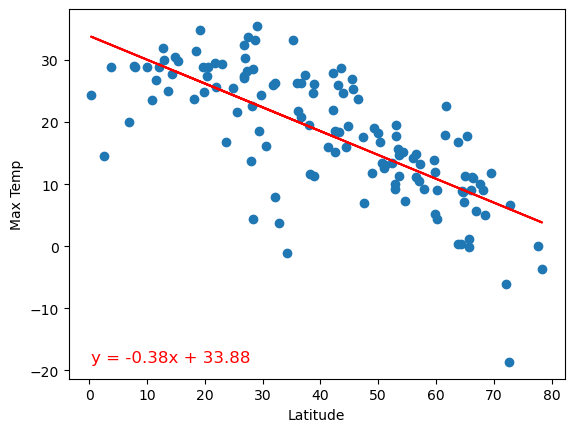

In [72]:
# Linear regression on Northern Hemisphere
drawLinearRegressionPlot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

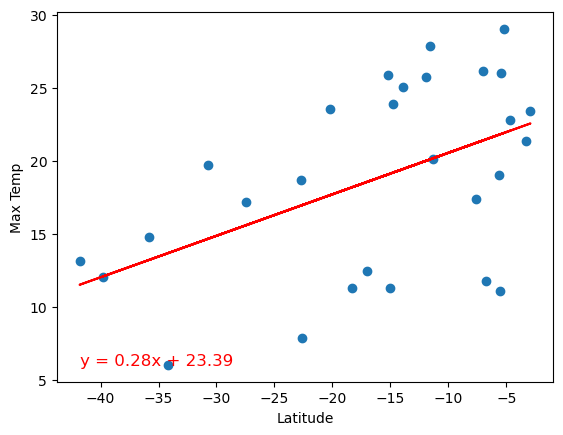

In [73]:
# Linear regression on Southern Hemisphere
drawLinearRegressionPlot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

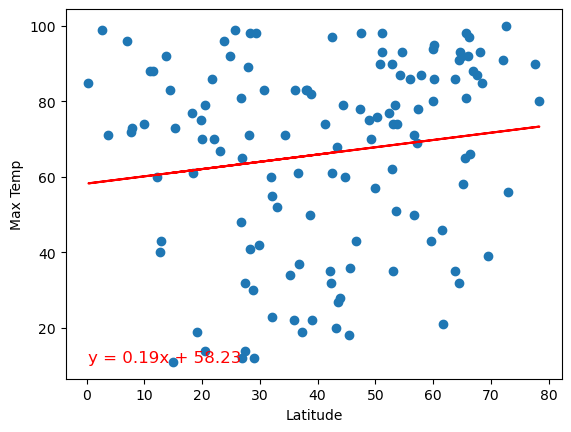

In [74]:
# Northern Hemisphere
drawLinearRegressionPlot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

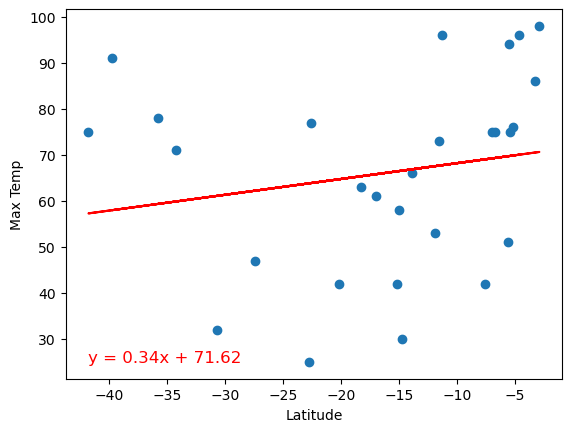

In [75]:
# Southern Hemisphere
drawLinearRegressionPlot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

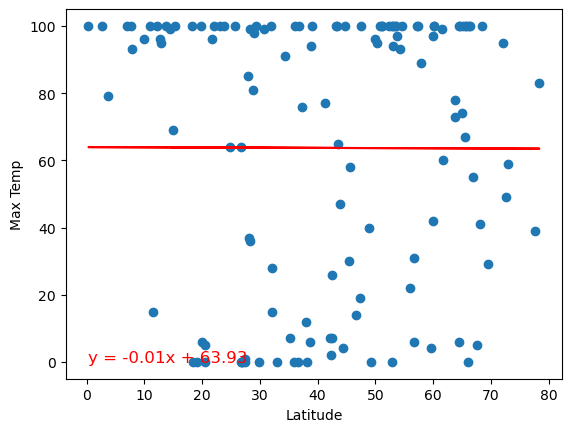

In [76]:
# Northern Hemisphere
drawLinearRegressionPlot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

The r-value is: 0.02056735429994368


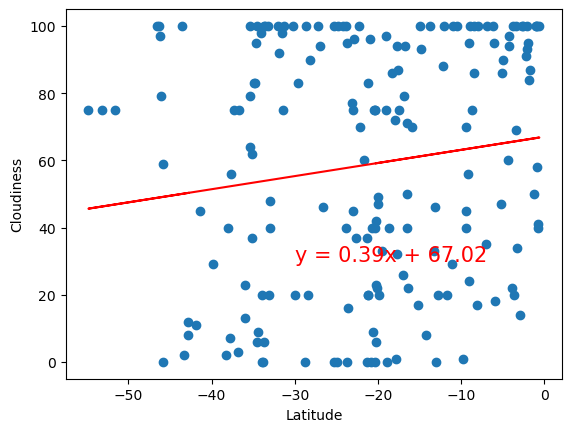

In [ ]:
# Southern Hemisphere
drawLinearRegressionPlot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

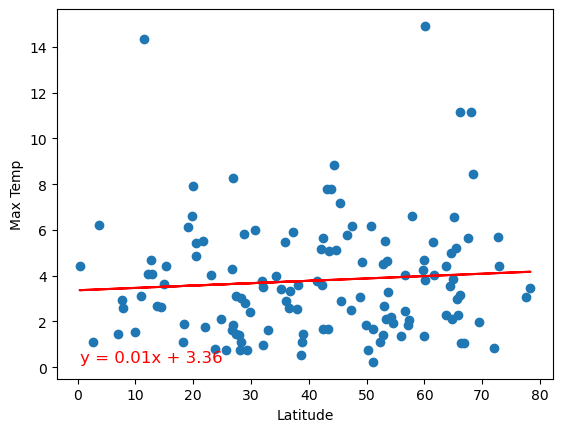

In [77]:
# Northern Hemisphere
drawLinearRegressionPlot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

The r-value is: 0.062239040700515696


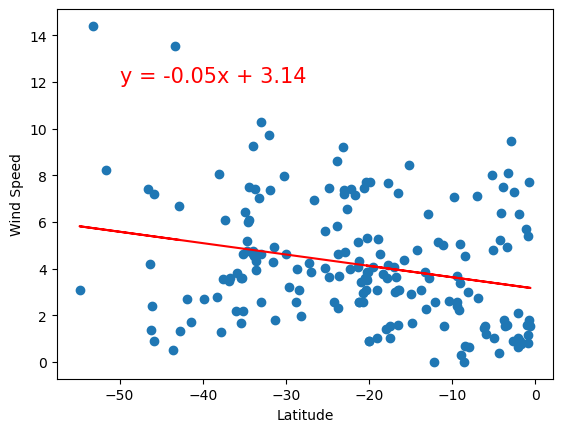

In [ ]:
# Southern Hemisphere
drawLinearRegressionPlot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE